# **TP : Analyse Statistique des Coûts Médicaux (ANOVA & Chi-2) réalisé par Abdechakour Omari**

# **1. IMPORTATION ET EXPLORATION DES DONNÉES**

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from scipy.stats import f_oneway, chi2_contingency

warnings.filterwarnings('ignore')

df = pd.read_csv("insurance.csv")
print("\nAPERÇU DES DONNÉES:")
print(df.head(10))
print("\nSTRUCTURE DES DONNÉES:")
print(f"Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print("Types de variables:")
print(df.dtypes)
print("\nVÉRIFICATION DES VALEURS MANQUANTES:")
print(df.isna().sum())
if df.isna().sum().sum() == 0:
    print("Aucune valeur manquante détectée")
print("\nSTATISTIQUES DESCRIPTIVES:")
print(df.describe())





APERÇU DES DONNÉES:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

STRUCTURE DES DONNÉES:
Dimensions: 1338 lignes × 7 colonnes
Types de variables:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

VÉRIFICATION DES VALEURS MANQUANTES:
ag

# **2. ÉTUDE DE CAS A: LE BMI DÉPEND-IL DE LA RÉGION ? (ANOVA)**

Question 1: Analyse Visuelle (Validation intuitive)

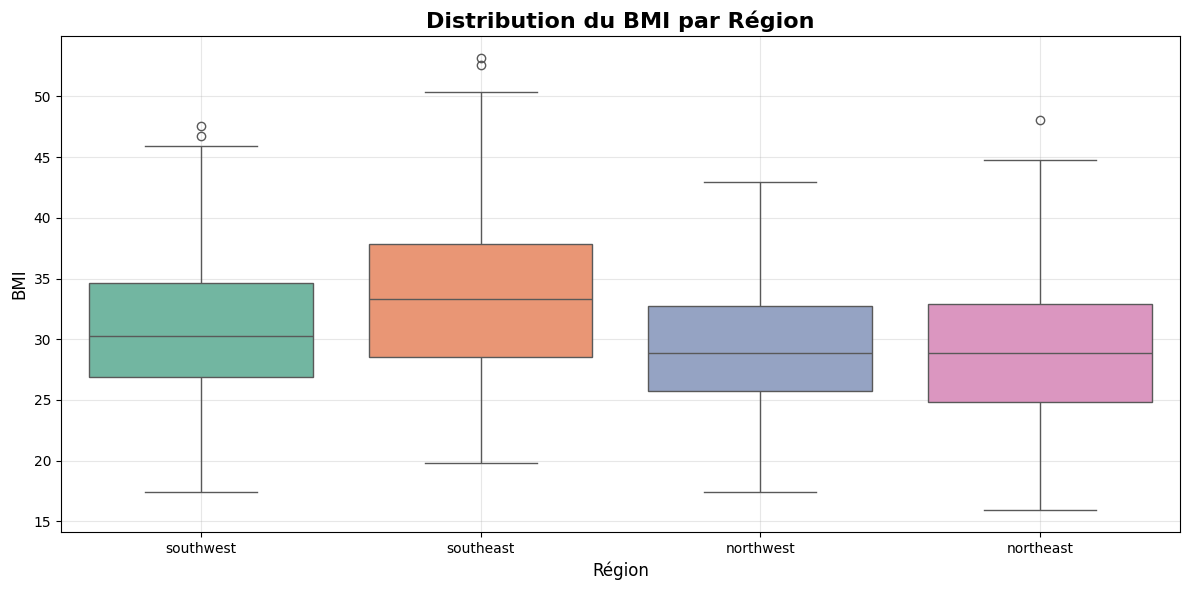

Observation: 
Les boîtes ont des tailles comparables, on peut supposer que la variabilité est stable entre les groupes, ce qui nous autorise à faire l'ANOVA sans calculs complexes.


In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='bmi', data=df, palette='Set2')
plt.title('Distribution du BMI par Région', fontsize=16, fontweight='bold')
plt.xlabel('Région', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("Observation: ")
print("Les boîtes ont des tailles comparables, on peut supposer que la variabilité est stable entre les groupes, ce qui nous autorise à faire l'ANOVA sans calculs complexes.")

Question 2: Statistiques Descriptives

In [14]:
stats_bmi = df.groupby('region')['bmi'].agg(['mean', 'std', 'count'])
print("Moyenne et écart-type du BMI par région:")
print(stats_bmi)
print("\nVérification: Les écarts-types sont proches (autour de 6, confirmant l'homogénéité des variances.")

Moyenne et écart-type du BMI par région:
                mean       std  count
region                               
northeast  29.173503  5.937513    324
northwest  29.199785  5.136765    325
southeast  33.355989  6.477648    364
southwest  30.596615  5.691836    325

Vérification: Les écarts-types sont proches (autour de 6, confirmant l'homogénéité des variances.


Question 3: Test ANOVA

In [19]:
print("\nHypothèses:")
print("H₀: Le BMI moyen est identique dans toutes les régions")
print("H₁: Au moins une région a un BMI moyen différent")
northeast = df[df['region'] == 'northeast']['bmi']
northwest = df[df['region'] == 'northwest']['bmi']
southeast = df[df['region'] == 'southeast']['bmi']
southwest = df[df['region'] == 'southwest']['bmi']
f_stat, p_value = f_oneway(northeast, northwest, southeast, southwest)
print(f"\nRésultats du test ANOVA:")
print(f"Statistique F: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: p-value ({p_value:.4f}) < {alpha}")
    print("On REJETTE H₀: Il existe des différences significatives de BMI entre les régions.")
else:
    print(f"\nConclusion: p-value ({p_value:.4f}) > {alpha}")
    print("On NE REJETTE PAS H₀: Pas de différence significative de BMI entre les régions.")



Hypothèses:
H₀: Le BMI moyen est identique dans toutes les régions
H₁: Au moins une région a un BMI moyen différent

Résultats du test ANOVA:
Statistique F: 39.4951
P-value: 0.0000

Conclusion: p-value (0.0000) < 0.05
On REJETTE H₀: Il existe des différences significatives de BMI entre les régions.


Question 4: Analyse Post-hoc (Comparaisons multiples)

In [21]:
from scipy.stats import ttest_ind

regions = df['region'].unique()
print("\n Comparaisons par paires (Test t de Student):")

comparisons = []
for i in range(len(regions)):
    for j in range(i+1, len(regions)):
        group1 = df[df['region'] == regions[i]]['bmi']
        group2 = df[df['region'] == regions[j]]['bmi']
        t_stat, p_val = ttest_ind(group1, group2)
        comparisons.append({
            'Comparaison': f"{regions[i]} vs {regions[j]}",
            'Différence moyenne': group1.mean() - group2.mean(),
            'p-value': p_val
        })

comp_df = pd.DataFrame(comparisons)
print(comp_df.to_string(index=False))

print("\nCONCLUSION BUSINESS :")
bmi_means = df.groupby('region')['bmi'].mean().sort_values(ascending=False)
print(f"Classement des régions par BMI moyen (décroissant):")
print(bmi_means)
print(f"Région la plus à risque: {bmi_means.index[0]} (BMI moyen = {bmi_means.values[0]:.2f})")


 Comparaisons par paires (Test t de Student):
           Comparaison  Différence moyenne      p-value
southwest vs southeast           -2.759374 5.437401e-09
southwest vs northwest            1.396831 1.076958e-03
southwest vs northeast            1.423112 1.908616e-03
southeast vs northwest            4.156204 2.643571e-19
southeast vs northeast            4.182486 1.186015e-17
northwest vs northeast            0.026282 9.519292e-01

CONCLUSION BUSINESS :
Classement des régions par BMI moyen (décroissant):
region
southeast    33.355989
southwest    30.596615
northwest    29.199785
northeast    29.173503
Name: bmi, dtype: float64
Région la plus à risque: southeast (BMI moyen = 33.36)
